# AFP data test

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/Missing_Migrants_Global_Figures_allData_1.csv')

In [3]:
df.describe()

,Incident year,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Source Quality
count,12901.000000,12343.000000,1296.000000,12901.000000,2062.000000,2327.000000,7954.000000,1568.000000,12900.000000
mean,2019.025424,2.627562,18.918210,4.414386,41.098448,2.556081,1.806638,1.970663,3.251395
std,2.401318,9.765509,45.960797,19.971388,99.398680,6.340524,4.719394,6.717124,1.369762
min,2014.000000,0.000000,-2.000000,1.000000,-2.000000,0.000000,0.000000,0.000000,1.000000
25%,2017.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000
50%,2019.000000,1.000000,6.000000,1.000000,13.000000,1.000000,1.000000,1.000000,4.000000
75%,2021.000000,2.000000,17.000000,2.000000,38.750000,2.000000,1.000000,2.000000,4.000000
max,2023.000000,750.000000,750.000000,1022.000000,1950.000000,94.000000,135.000000,250.000000,5.000000


So we can see in total that the dataset has 12901 entries. 

Let's look at the columns.

In [4]:
# Show all columns
pd.set_option('display.max_columns', None)

In [5]:
df.head(2)

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Region of Origin,Cause of Death,Country of Origin,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1.0,NaN,1,NaN,NaN,1.0,NaN,Central America,Mixed or unknown,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America,NaN,5.0,http://humaneborders.info/
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1.0,NaN,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN


In [6]:
# Let's see what the different migration routes are
df['Migration route'].unique()

array(['US-Mexico border crossing', nan, 'Eastern Mediterranean',
       'English Channel to the UK', 'Caribbean to US',
       'Western Mediterranean', 'Central Mediterranean',
       'Haiti to Dominican Republic', 'Horn of Africa to Yemen crossing',
       'Sahara Desert crossing',
       'Western Africa / Atlantic route to the Canary Islands',
       'Syria to Türkiye', 'Western Balkans', 'Türkiye-Europe land route',
       'Dominican Republic to Puerto Rico', 'Comoros to Mayotte',
       'Venezuela to Caribbean', 'Darien', 'Iran to Türkiye',
       'Italy to France', 'Afghanistan to Iran', 'DRC to Uganda',
       'Central Mediterranean,Sahara Desert crossing',
       'Belarus-EU border', 'Ukraine to Europe',
       'Caribbean to Central America'], dtype=object)

In [7]:
# Save a new dataframe that only represents US-Mexico border route
df[df['Migration route']=='US-Mexico border crossing'].to_csv('data/US-Mexico-missing-migrants.csv',index=False)

In [8]:
# Load new data
df = pd.read_csv('data/US-Mexico-missing-migrants.csv')

In [37]:
df.head(2)

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Region of Origin,Cause of Death,Country of Origin,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1.0,NaN,1,NaN,NaN,1.0,NaN,Central America,Mixed or unknown,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America,NaN,5.0,http://humaneborders.info/
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1.0,NaN,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN


In [10]:
# Check that the number of dead matches what we're expecting
df['Number of Dead'].sum()

4467.0

## Number of deaths over time

We know the total number of dead or missing from 2014-2023. What patterns are there in the number of deaths per year -- is the border crossing becoming more or less deadly over time?

In [112]:
df[['Incident year', 'Number of Dead', 'Total Number of Dead and Missing']].groupby('Incident year').sum()

,Number of Dead,Total Number of Dead and Missing
Incident year,,
2014,304.0,304
2015,344.0,347
2016,403.0,412
2017,404.0,414
2018,444.0,448
2019,503.0,524
2020,465.0,475
2021,717.0,729
2022,652.0,666


We can see that the trend is for more deaths over time, though 2022 was less deadly than 2021.

In [84]:
# What's the most recent date?
df.tail(1)

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Region of Origin,Cause of Death,Country of Origin,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL,Date
3347,2023.MMP0464,2023.MMP0464,Incident,Central America,2023-07-03,2023,July,1.0,NaN,1,NaN,NaN,1.0,NaN,Latin America / Caribbean (P),Harsh environmental conditions / lack of adequ...,Unknown,US-Mexico border crossing,"Undetermined location in Ojinaga, Chihuahua, M...","La Opcion de Chihuahua, El Fronterizo","29.55381837, -104.395895",Central America,Investigan muerte de migrante por supuesto gol...,3.0,https://archive.ph/NWZCx,2023-07-03


In [20]:
# use Seaborn for basic plot styling
import seaborn as sns
sns.set()

<AxesSubplot: xlabel='Incident year'>

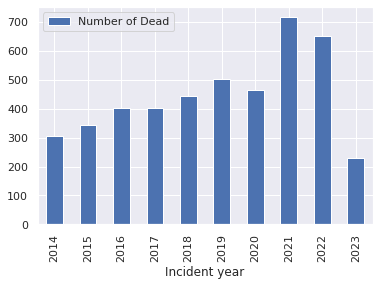

In [30]:
# Make an exploratory plot
df[['Incident year', 'Number of Dead']].groupby('Incident year').sum().plot(kind='bar')

In [72]:
df[['Website Date','Number of Dead']].to_csv('data/Deaths-by-date.csv',index=False)

### Demographics of dead/missing migrants

The dataset gives us information about whether dead/missing migrants are men, women or children. We can use this to look at whether the composition of migrants crossing the border is changing over time.

In [81]:
df[['Incident year','Number of Males', 'Number of Females', 'Number of Children']]\
    .groupby('Incident year').sum()

,Number of Males,Number of Females,Number of Children
Incident year,,,
2014,75.0,6.0,2.0
2015,161.0,19.0,3.0
2016,246.0,23.0,8.0
2017,275.0,20.0,7.0
2018,281.0,39.0,11.0
2019,311.0,51.0,27.0
2020,305.0,40.0,8.0
2021,375.0,96.0,21.0
2022,454.0,100.0,29.0


We can now use the above data to create a grouped bar chart in Datawrapper:

[Migrant deaths or disappearances at the US-Mexico border ](https://www.datawrapper.de/_/hO8s5/)

## Location of deaths

In [93]:
dfcoord = df[['Incident year','Number of Dead','Coordinates']].copy()

For Datawrapper we need to split lat and long

In [96]:
dfcoord[['Lat','Long']] = dfcoord["Coordinates"].str.split(",", expand=True)

In [99]:
dfcoord.drop('Coordinates',axis=1,inplace=True)

In [101]:
dfcoord.to_csv('data/Deaths-with-coordinates.csv')

NOTE: I tried loading this into Datawrapper, but it would need a custom map as it doesn't display appropriately on US map.

https://www.datawrapper.de/_/1wEwX/

### Regions of origin

We want to create a chart with multiple donuts exploring if/how region of origin has changed over time.

For this we first need to use a pivot table to get the data into the right shape.

In [110]:
pd.pivot_table(df, index='Incident year',
               columns='Region of Origin', 
               values='Number of Dead',
               fill_value=0,
               aggfunc='sum')

Region of Origin,Caribbean,Central America,Central America (P),Eastern Asia,Europe,Latin America / Caribbean (P),Middle Africa,Northern Africa,Northern America,South America,South America (P),Southern Africa,Southern Asia,Sub-Saharan Africa (P),Unknown,Western Africa
Incident year,,,,,,,,,,,,,,,,
2014,0,20,0,0,0,283,0,0,0,1,0,0,0,0,0,0
2015,0,53,0,0,0,289,0,0,0,2,0,0,0,0,0,0
2016,2,125,0,0,0,271,0,0,0,2,0,0,0,0,3,0
2017,0,115,0,0,0,280,0,0,0,6,0,0,0,0,3,0
2018,2,162,0,0,0,272,0,0,0,2,0,0,3,0,3,0
2019,3,177,0,4,1,302,1,0,0,14,0,0,1,0,0,0
2020,7,161,0,0,0,281,0,0,0,15,0,1,0,0,0,0
2021,12,264,1,0,0,407,0,0,0,20,0,0,0,0,12,1
2022,15,296,6,0,1,291,1,1,2,28,7,0,1,1,2,0


In [111]:
pd.pivot_table(df, index='Incident year',
               columns='Region of Origin', 
               values='Number of Dead',
               fill_value=0,
               aggfunc='sum').to_csv('data/Region-of-origin.csv')

Data used to create the following chart:

[Migrant deaths or at the US-Mexico border by region of origin](https://www.datawrapper.de/_/d43EJ/)

But note that more work needs to be done to publish this, as there is inconsistent grouping of countries (i.e. "Latin America / Caribbean" category overlaps with "Caribbean" and "Central America"/"South America".

## Cause of death

In [123]:
# Make a simple sum of the causes of death recorded
df['Cause of Death'].value_counts()

Mixed or unknown                                                          1473
Drowning                                                                   863
Harsh environmental conditions / lack of adequate shelter, food, water     612
Vehicle accident / death linked to hazardous transport                     157
Violence                                                                   116
Accidental death                                                            69
Sickness / lack of access to adequate healthcare                            58
Name: Cause of Death, dtype: int64

In [121]:
df['Cause of Death'].value_counts().to_csv('data/Cause of Death.csv')